## To make contour plots as monthly climatology and the difference between rean and gpsro, inspo Kim and Son

In [ ]:
## Copy to make path right for 

In [56]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import datetime
import cartopy as ccrs
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple


In [57]:
path = '/Users/johannemehren/Desktop/filer/'

era5_zonmean = xr.open_dataset(path + 'FULL-ERA5.tp.monzonmean.2000-2018.nc4')
erai_zonmean = xr.open_dataset(path + 'erai.tp.ctp.monmean.zm.nc')
gpsro = xr.open_dataset(path + 'GPS-RO__CP_LR_5x5_2007-2018.nc')

ds = xr.open_dataset(path + 'gridfile_test.nc')
ds2 = xr.open_dataset(path + 'erai_regrid_5x5.nc')

In [58]:
era5_trop = era5_zonmean.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))
era5_mon = era5_trop.groupby('time.month').mean(dim='time')

erai_trop = erai_zonmean.sel(lat=slice(20,-20), time=slice('2007-01-01', '2018-12-31'))
erai_mon = erai_trop.groupby('time.month').mean(dim='time')

In [59]:
erai_grid = ds2.sel(lat=slice(-20,20),time=slice('2007-01-01', '2018-12-31'))
erai_grid_mon = erai_grid.groupby('time.month').mean(dim='time')
erai_zon = erai_grid_mon.mean(axis=2)
erai_zon['month'] = erai_grid_mon.month
erai_zon['lat'] = erai_grid_mon.lat
erai_mean = erai_zon.mean(axis=1)
erai_mean['month'] = erai_zon.month

era5_grid = ds.sel(lat=slice(-20,20))
era5_grid_mon = era5_grid.groupby('time.month').mean(dim='time')
era5_zon = era5_grid_mon.mean(axis=2)
era5_zon['month'] = era5_grid_mon.month
era5_zon['lat'] = era5_grid_mon.lat
era5_mean = era5_zon.mean(axis=1)
era5_mean['month'] = era5_zon.month

gpsro_trop = gpsro.sel(lat=slice(-20,20))
gpsro_mm = gpsro_trop.resample(time='M').mean()
gpsro_mon = gpsro_mm.groupby('time.month').mean(dim='time')
gpsro_zon = gpsro_mon.mean(axis=(2))

gpsro_zon['month'] = gpsro_mon.month
gpsro_zon['lat'] = gpsro_mon.lat

gpsro_mean = gpsro_zon.mean(axis=1)
gpsro_mean['month'] = gpsro_zon.month

/Users/johannemehren/opt/anaconda3/envs/py36/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


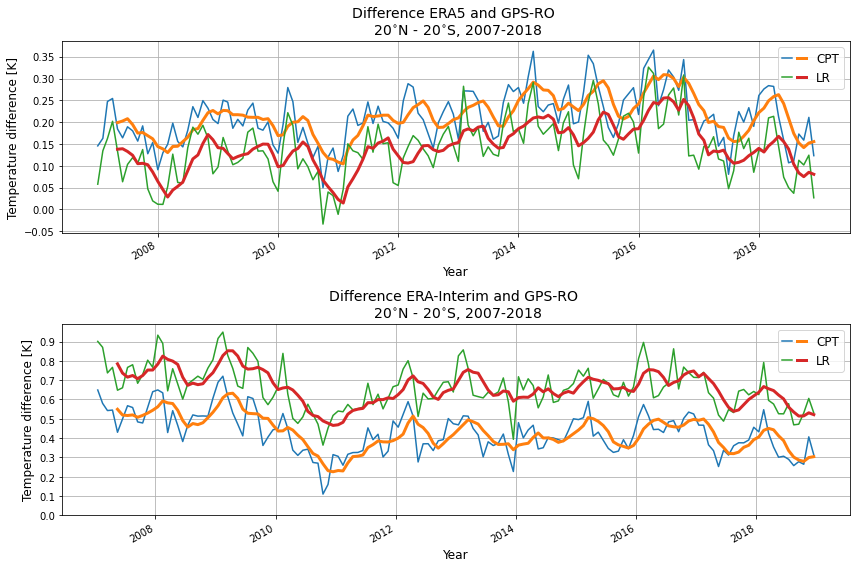

In [8]:
fig, axs = plt.subplots(2,1,figsize=(12,8))

era5_tm = era5_grid.ctpt.mean(axis=(1,2))
era5_lrt_tm = era5_grid.tpt.mean(axis=(1,2))
erai_tm = erai_grid.ctpt.mean(axis=(1,2))
erai_lrt_tm = erai_grid.tpt.mean(axis=(1,2))
gpsro_tm = gpsro_mm.CP_T.mean(axis=(1,2))
gpsro_lrt_tm = gpsro_mm.LR_T.mean(axis=(1,2))

diff = era5_tm - gpsro_tm.values
diff2 = era5_lrt_tm - gpsro_lrt_tm.values
diff3 = erai_tm - gpsro_tm.values
diff4 = erai_lrt_tm - gpsro_lrt_tm.values

d1, = diff.plot(ax=axs[0])
d2, = diff.rolling(time=5).mean().plot(ax =axs[0],linewidth=3)

d3, = diff2.plot(ax=axs[0])
d4, = diff2.rolling(time=5).mean().plot(ax=axs[0],linewidth=3)

d5, = diff3.plot(ax=axs[1])
d6, = diff3.rolling(time=5).mean().plot(ax=axs[1],linewidth=3)

d7, = diff4.plot(ax=axs[1])
d8, = diff4.rolling(time=5).mean().plot(ax=axs[1],linewidth=3)

deg = '$^{\circ}$'
axs[0].set_title('Difference ERA5 and GPS-RO \n 20'+deg+'N - 20'+deg+'S, 2007-2018', fontsize=14)
axs[1].set_title('Difference ERA-Interim and GPS-RO \n 20'+deg+'N - 20'+deg+'S, 2007-2018', fontsize=14)

l = axs[0].legend([(d1, d2), (d3, d4)], ['CPT', 'LR'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=12)
l2 = axs[1].legend([(d5, d6), (d7, d8)], ['CPT', 'LR'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=12)
axs[1].set_yticks(np.linspace(0, 0.9,10))
for ax in axs:
    ax.grid()
    ax.set_ylabel('Temperature difference [K]', fontsize=12)
    ax.set_xlabel('Year', fontsize=12)

plt.tight_layout()
#plt.xlim('2007','2009')
#fig.savefig('figs/timeseries_tempdiff_rean-gpsro_2007-2018.png')

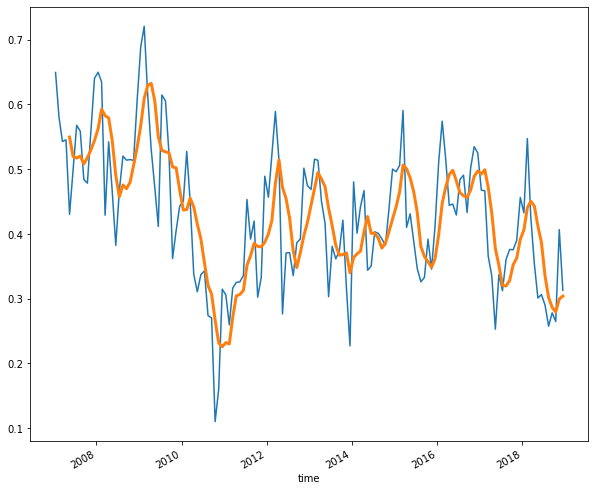

In [10]:
plt.figure(figsize=(10,8))
era5_tm = era5_grid.ctpt.mean(axis=(1,2))
erai_tm = erai_grid.ctpt.mean(axis=(1,2))
gpsro_tm = gpsro_mm.CP_T.mean(axis=(1,2))
diff = era5_tm - gpsro_tm.values
diff2 = erai_tm - gpsro_tm.values
diff2.plot()
diff2.rolling(time=5).mean().plot(linewidth=3)
#plt.xlim('2007','2011')

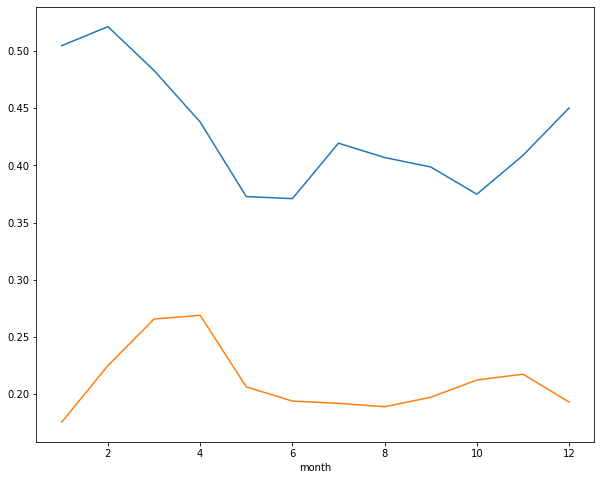

In [17]:
plt.figure(figsize=(10,8))
dd1 = era5_mean.ctpt - gpsro_mean.CP_T
dd2 = erai_mean.ctpt - gpsro_mean.CP_T
dd2.plot()
dd1.plot()

In [60]:
d1 = era5_zon.ctpt - gpsro_zon.CP_T.values
d2 = erai_zon.ctpt - gpsro_zon.CP_T.values


d3 = era5_zon.tpt - gpsro_zon.LR_T.values
d4 = erai_zon.tpt - gpsro_zon.LR_T.values

d5 = era5_zon.ctpz - gpsro_zon.CP_z.values
d6 = erai_zon.ctpz - gpsro_zon.CP_z.values

d7 = era5_zon.tpz - gpsro_zon.LR_z.values
d8 = erai_zon.tpz - gpsro_zon.LR_z.values

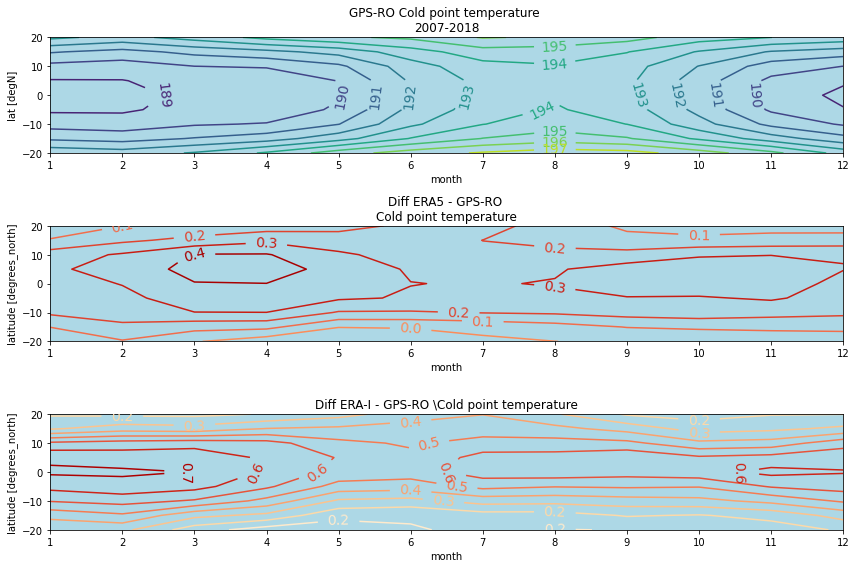

In [68]:
mon=np.linspace(1,12,12)
f, axs = plt.subplots(3,1,figsize=(12,8))


con_0 = gpsro_zon.CP_T.plot.contour(ax=axs[0], x='month', y = 'lat', levels=10)
axs[0].clabel(con_0,fmt='%1.0f', fontsize=14)
axs[0].set_title('GPS-RO Cold point temperature \n2007-2018', fontsize=12)

con = d1.plot.contour(ax=axs[1], x='month', y='lat', levels=10, cmap = 'OrRd')
axs[1].clabel(con,fmt='%1.1f', fontsize=14)
axs[1].set_title('Diff ERA5 - GPS-RO \nCold point temperature', fontsize=12)

con2 = d2.plot.contour(ax=axs[2], x='month', y='lat', levels=10, cmap = 'OrRd')
axs[2].clabel(con2,fmt='%1.1f', fontsize=14)
axs[2].set_title('Diff ERA-I - GPS-RO \Cold point temperature', fontsize=12)

for ax in axs:
    
    ax.set_xticks(mon)
    
    ax.set_facecolor('lightblue')
    
plt.tight_layout()

#plt.savefig('figs/zonmean_contour_CPT_monthlyclim_2007-2018.png')

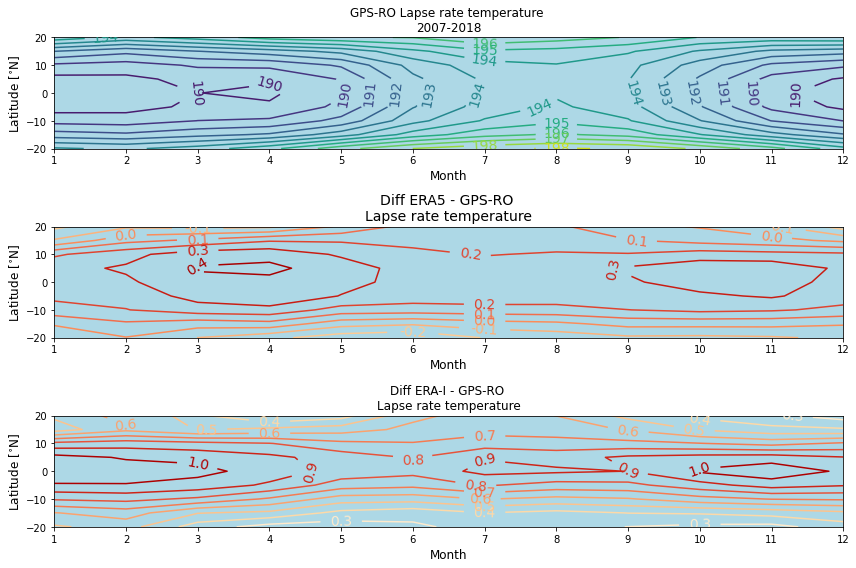

In [62]:
mon=np.linspace(1,12,12)
f, axs = plt.subplots(3,1,figsize=(12,8))


con_0 = gpsro_zon.LR_T.plot.contour(ax=axs[0], x='month', y = 'lat', levels=15)
axs[0].clabel(con_0,fmt='%1.0f', fontsize=14)
axs[0].set_title('GPS-RO Lapse rate temperature \n2007-2018', fontsize=12)

con = d3.plot.contour(ax=axs[1], x='month', y='lat', levels=10, cmap = 'OrRd')
axs[1].clabel(con,fmt='%1.1f', fontsize=14)
axs[1].set_title('Diff ERA5 - GPS-RO \nLapse rate temperature', fontsize=14)

con2 = d4.plot.contour(ax=axs[2], x='month', y='lat', levels=10, cmap = 'OrRd')
axs[2].clabel(con2,fmt='%1.1f', fontsize=14)
axs[2].set_title('Diff ERA-I - GPS-RO \nLapse rate temperature', fontsize=12)

for ax in axs:
    
    ax.set_xticks(mon)
    
    ax.set_facecolor('lightblue')
    ax.set_ylabel('Latitude [$^{\circ}$N]', fontsize=12)
    ax.set_xlabel('Month', fontsize=12)
    
plt.tight_layout()

#plt.savefig('figs/zonmean_contour_LRT_monthlyclim_2007-2018.png')

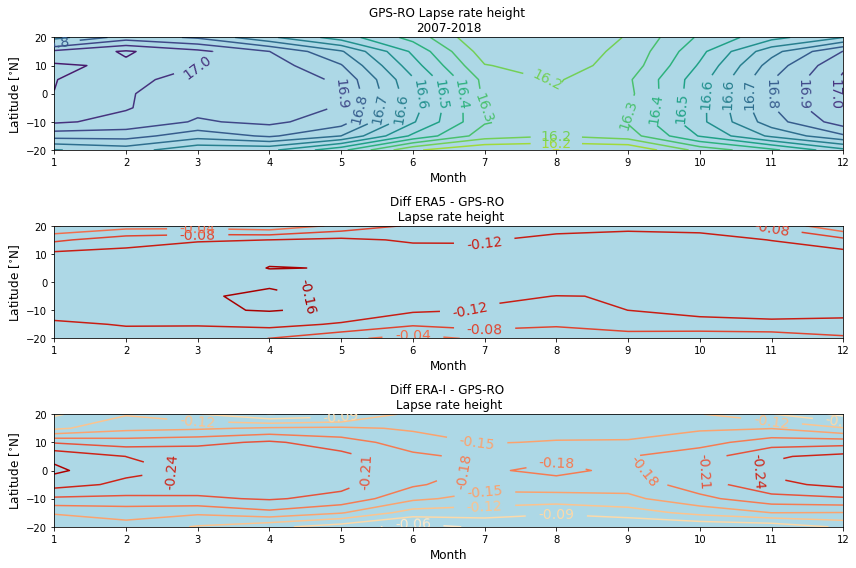

In [54]:
mon=np.linspace(1,12,12)
f, axs = plt.subplots(3,1,figsize=(12,8))


con_0 = gpsro_zon.LR_z.plot.contour(ax=axs[0], x='month', y = 'lat', levels=15, cmap = 'viridis_r')
axs[0].clabel(con_0,fmt='%1.1f', fontsize=14)
axs[0].set_title('GPS-RO Lapse rate height \n2007-2018', fontsize=12)

con = d7.plot.contour(ax=axs[1], x='month', y='lat', levels=10, cmap = 'OrRd_r')
axs[1].clabel(con,fmt='%1.2f', fontsize=14)
axs[1].set_title('Diff ERA5 - GPS-RO \n Lapse rate height', fontsize=12)

con2 = d8.plot.contour(ax=axs[2], x='month', y='lat', levels=10, cmap = 'OrRd_r')
axs[2].clabel(con2,fmt='%1.2f', fontsize=14)
axs[2].set_title('Diff ERA-I - GPS-RO \nLapse rate height', fontsize=12)

for ax in axs:
    
    ax.set_xticks(mon)
    
    ax.set_facecolor('lightblue')
    ax.set_ylabel('Latitude [$^{\circ}$N]', fontsize=12)
    ax.set_xlabel('Month', fontsize=12)
    
plt.tight_layout()

#plt.savefig('figs/zonmean_contour_LRZ_monthlyclim_2007-2018.png')

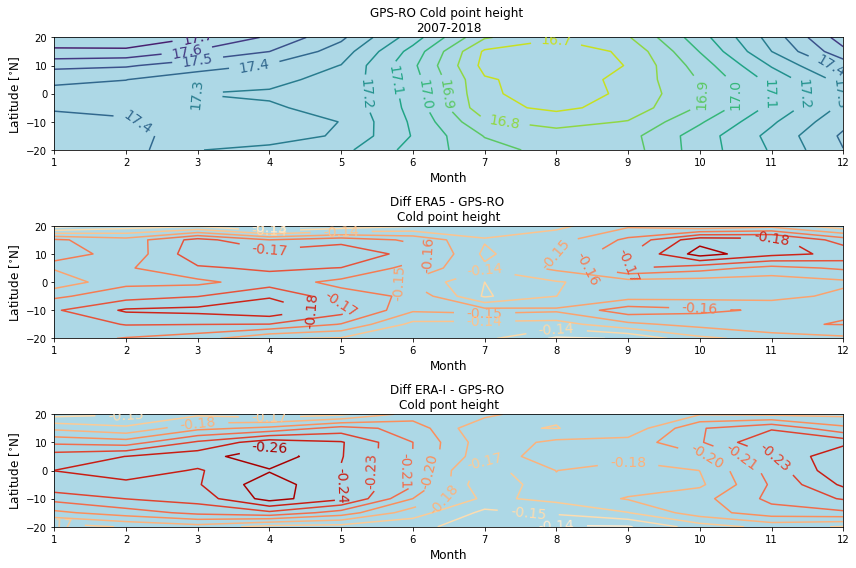

In [55]:
mon=np.linspace(1,12,12)
f, axs = plt.subplots(3,1,figsize=(12,8))


con_0 = gpsro_zon.CP_z.plot.contour(ax=axs[0], x='month', y = 'lat', levels=15, cmap = 'viridis_r' )
axs[0].clabel(con_0,fmt='%1.1f', fontsize=14)
axs[0].set_title('GPS-RO Cold point height \n2007-2018', fontsize=12)

con = d5.plot.contour(ax=axs[1], x='month', y='lat', levels=10, cmap = 'OrRd_r')
axs[1].clabel(con,fmt='%1.2f', fontsize=14)
axs[1].set_title('Diff ERA5 - GPS-RO \nCold point height', fontsize=12)

con2 = d6.plot.contour(ax=axs[2], x='month', y='lat', levels=10, cmap = 'OrRd_r')
axs[2].clabel(con2,fmt='%1.2f', fontsize=14)
axs[2].set_title('Diff ERA-I - GPS-RO \nCold pont height', fontsize=12)

for ax in axs:
    
    ax.set_xticks(mon)
    
    ax.set_facecolor('lightblue')
    ax.set_ylabel('Latitude [$^{\circ}$N]', fontsize=12)
    ax.set_xlabel('Month', fontsize=12)
    
plt.tight_layout()


#plt.savefig('figs/zonmean_contour_CPZ_monthlyclim_2007-2018.png')